## Modifying DataFrames
In the previous lesson, you learned what a DataFrame is and how to select subsets of data from one.

In this lesson, you’ll learn how to modify an existing DataFrame. Some of the skills you’ll learn include:

### Adding columns to a DataFrame
### Using lambda functions to calculate complex quantities
### Renaming columns


### Adding a Column I
Sometimes, we want to add a column to an existing DataFrame.
We might want to add new information or perform a calculation based on the data that we already have.
One way that we can add a new column is by giving a <span style="color:red"> list of the same length as the existing DataFrame.</span> 

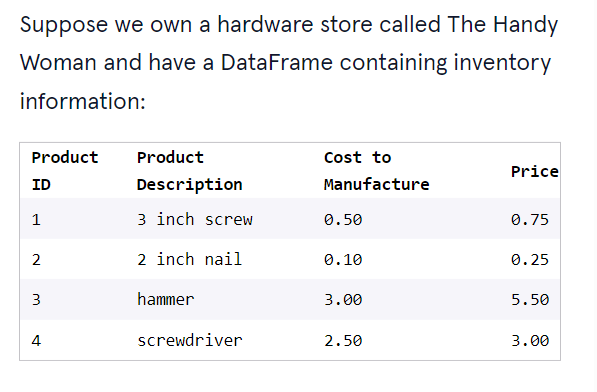

df['Quantity'] = [100, 150, 50, 35]

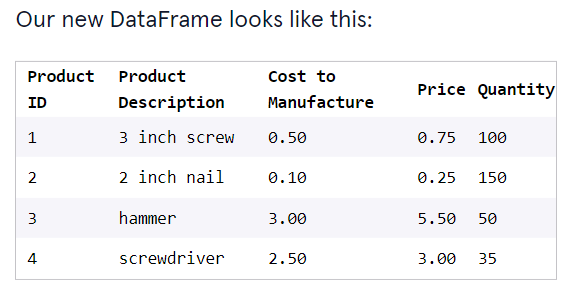


In [1]:
import pandas as pd

df = pd.DataFrame([
  [1, '3 inch screw', 0.5, 0.75],
  [2, '2 inch nail', 0.10, 0.25],
  [3, 'hammer', 3.00, 5.50],
  [4, 'screwdriver', 2.50, 3.00]
],
  columns=['Product ID', 'Description', 'Cost to Manufacture', 'Price']
)

# Add columns here

print(df)

   Product ID   Description  Cost to Manufacture  Price
0           1  3 inch screw                  0.5   0.75
1           2   2 inch nail                  0.1   0.25
2           3        hammer                  3.0   5.50
3           4   screwdriver                  2.5   3.00


 Add a column to df called 'Sold in Bulk?', which indicates if the product is sold in bulk or individually. 

In [2]:
df['Sold in Bulk?'] = ['Yes','Yes','No','No']


In [3]:
print(df)


   Product ID   Description  Cost to Manufacture  Price Sold in Bulk?
0           1  3 inch screw                  0.5   0.75           Yes
1           2   2 inch nail                  0.1   0.25           Yes
2           3        hammer                  3.0   5.50            No
3           4   screwdriver                  2.5   3.00            No


### Adding a Column II
We can also add a new column that is the same for all rows in the DataFrame.
Suppose we know that all of our products are currently in-stock. We can add a column that says this:

df['In Stock?'] = True


In [4]:
import pandas as pd

df = pd.DataFrame([
  [1, '3 inch screw', 0.5, 0.75],
  [2, '2 inch nail', 0.10, 0.25],
  [3, 'hammer', 3.00, 5.50],
  [4, 'screwdriver', 2.50, 3.00]
],
  columns=['Product ID', 'Description', 'Cost to Manufacture', 'Price']
)

# Add columns here
df['Is taxed?'] = 'Yes'
print(df)

   Product ID   Description  Cost to Manufacture  Price Is taxed?
0           1  3 inch screw                  0.5   0.75       Yes
1           2   2 inch nail                  0.1   0.25       Yes
2           3        hammer                  3.0   5.50       Yes
3           4   screwdriver                  2.5   3.00       Yes


### Adding a Column III
Finally, you can add a new column by performing a function on the existing columns.
df['Sales Tax'] = df.Price * 0.075



In [5]:
import pandas as pd

df = pd.DataFrame([
  [1, '3 inch screw', 0.5, 0.75],
  [2, '2 inch nail', 0.10, 0.25],
  [3, 'hammer', 3.00, 5.50],
  [4, 'screwdriver', 2.50, 3.00]
],
  columns=['Product ID', 'Description', 'Cost to Manufacture', 'Price']
)

df['Margin'] = df['Price'] - df['Cost to Manufacture']

print(df)

   Product ID   Description  Cost to Manufacture  Price  Margin
0           1  3 inch screw                  0.5   0.75    0.25
1           2   2 inch nail                  0.1   0.25    0.15
2           3        hammer                  3.0   5.50    2.50
3           4   screwdriver                  2.5   3.00    0.50


### Performing Column Operations
We can use the apply function to apply a function to every value in a particular column. For example, this code overwrites the existing 'Name' columns by applying the function upper to every row in 'Name'

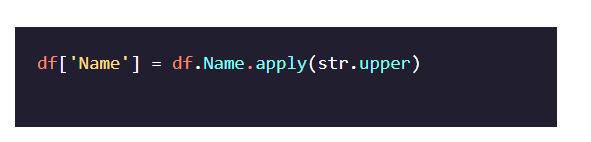



In [6]:
import pandas as pd

df = pd.DataFrame([
  ['JOHN SMITH', 'john.smith@gmail.com'],
  ['Jane Doe', 'jdoe@yahoo.com'],
  ['joe schmo', 'joeschmo@hotmail.com']
],
columns=['Name', 'Email'])

# Add columns here
df['Lowercase Name'] = df.Name.apply(str.lower)
print(df)

         Name                 Email Lowercase Name
0  JOHN SMITH  john.smith@gmail.com     john smith
1    Jane Doe        jdoe@yahoo.com       jane doe
2   joe schmo  joeschmo@hotmail.com      joe schmo


### Applying a Lambda to a Column
In Pandas, we often use lambda functions to perform complex operations on columns

df['Email Provider'] = df.Email.apply(
    lambda x: x.split('@')[-1]
    )
    
    

In [8]:
import pandas as pd

df = pd.read_csv('employees.csv')

# Add columns here
get_last_name = lambda x: x.split()[-1]
df['last_name'] = df.name.apply(get_last_name)

print(df)

FileNotFoundError: [Errno 2] No such file or directory: 'employees.csv'

### Applying a Lambda to a Row
We can also operate on multiple columns at once. If we use apply without specifying a single column and add the argument axis=1, the input to our lambda function will be an entire row, not a column. To access particular values of the row, we use the syntax row.column_name or row[‘column_name’].

df['Price with Tax'] = df.apply(lambda row:
     row['Price'] * 1.075
     if row['Is taxed?'] == 'Yes'
     else row['Price'],
     axis=1
)

import pandas as pd

df = pd.read_csv('employees.csv')

total_earned = lambda row: (row.hourly_wage * 40) + ((row.hourly_wage * 1.5) * (row.hours_worked - 40)) \
	if row.hours_worked > 40 \
  else row.hourly_wage * row.hours_worked
  
df['total_earned'] = df.apply(total_earned, axis = 1)

print(df)


### Renaming Columns


In [13]:
import pandas as pd

df = pd.DataFrame([
  [1, '3 inch screw', 0.5, 0.75],
  [2, '2 inch nail', 0.10, 0.25],
  [3, 'hammer', 3.00, 5.50],
  [4, 'screwdriver', 2.50, 3.00]
],
  columns=['Product ID', 'Description', 'Cost to Manufacture', 'Price']
)

print(df)
# Rename Column

df.columns = ['ID', 'Desc', 'Cost','New Price']
print(df)

   Product ID   Description  Cost to Manufacture  Price
0           1  3 inch screw                  0.5   0.75
1           2   2 inch nail                  0.1   0.25
2           3        hammer                  3.0   5.50
3           4   screwdriver                  2.5   3.00
   ID          Desc  Cost  New Price
0   1  3 inch screw   0.5       0.75
1   2   2 inch nail   0.1       0.25
2   3        hammer   3.0       5.50
3   4   screwdriver   2.5       3.00


df = pd.DataFrame({
    'name': ['John', 'Jane', 'Sue', 'Fred'],
    'age': [23, 29, 21, 18]
})
df.rename(columns={
    'name': 'First Name',
    'age': 'Age'},
    inplace=True)
    
Using rename with only the columns keyword will create a new DataFrame, leaving your original DataFrame unchanged. That’s why we also passed in the keyword argument inplace=True. Using inplace=True lets us edit the original DataFrame.

There are several reasons why .rename is preferable to .columns:

You can rename just one column
You can be specific about which column names are getting changed (with .column you can accidentally switch column names if you’re not careful)



In [ ]:
import pandas as pd

orders = pd.read_csv('shoefly.csv')

print(orders.head(5))

orders['shoe_source'] = orders.shoe_material.apply(lambda x: \
                        	'animal' if x == 'leather'else 'vegan')

orders['salutation'] = orders.apply(lambda row: \
                                    'Dear Mr. ' + row['last_name']
                                    if row['gender'] == 'male'
                                    else 'Dear Ms. ' + row['last_name'],
                                    axis=1)